In [27]:
import sys
import time
import matplotlib.pyplot as plt
from typing import Any, Callable, Mapping, Optional
# for plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import numpy as np

sys.path.append("C:\\Users\\Ozymandias\\TCSPC_project\\QuTag\\quTAG_MC-Software_Python-examples-20220711 (1)\\quTAG_MC-Software_Python-examples-20220711")

In [28]:
try:
        import QuTAG_MC
except:
        Exception("Time Tagger wrapper QuTAG.py is not in the search path.")

In [29]:
try:
    qutag = QuTAG_MC.QuTAG()
except Exception as e:
    print("Error initializing quTAG: ", e)

Initialize and Start with quTAG device:  No error


In [30]:
start = 0
stop = 1

In [31]:
# define lifetime histogram
binwidth = 2
bincount = 120

In [32]:
# Let's set some channel delays for adjusting the lifetime curve to the propper starting point at time difference zero
delays = np.zeros(int(8), dtype=np.int32)
delays[0] = 140 # ps
qutag.setChannelDelay(0,140)

0

In [33]:
# enable lifetime
print("Enable: ", qutag.enableLFT(True))

Enable:  0


In [34]:
# liftetime start input
qutag.setLFTStartInput(start) 

0

In [35]:
# set the parameters for the lifetime histigram
qutag.setLFTParams(binwidth, bincount)

0

In [36]:
# add the histogram with the desired stop channel and the before defined start input
qutag.addLFTHistogram(stop,True)

0

In [37]:
# create function
lftfunction = qutag.createLFTFunction()

In [38]:
params = qutag.getLFTParams()
print("params: ", params)

params:  (2, 120)


In [40]:
# get the lifetime histogram
histo  = qutag.getLFTHistogram(stop,True,lftfunction)
# Lifetime function lftfunction == histo[0]
print(histo[0])
print("Number of time diffs that were bigger than the biggest histogram bin: ", histo[1])
print("Number of start events contributing to the histogram: ", histo[2])
print("Number of stop events contributing to the histogram: ", histo[3])
print("Exposure time - the time difference between the first and last event that contribute to the histogram: ", histo[4])

getLFTHistogram
Number of time diffs that were bigger than the biggest histogram bin:  0
Number of start events contributing to the histogram:  0
Number of stop events contributing to the histogram:  0
Exposure time - the time difference between the first and last event that contribute to the histogram:  38500000000000


In [24]:
# get the lifetime histogram
histo  = qutag.getLFTHistogram(stop,True,lftfunction)
print("histo: ", histo)

getLFTHistogram
histo:  (<QuTAG_MC.LP_TDC_LftFunction object at 0x000001E1E2D173C0>, 0, 0, 0, 4040000000000)


In [25]:
analyse = qutag.analyseLFTFunction(lftfunction)
print("analyse: ", analyse)

analyse:  (120, 120, 2, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]))


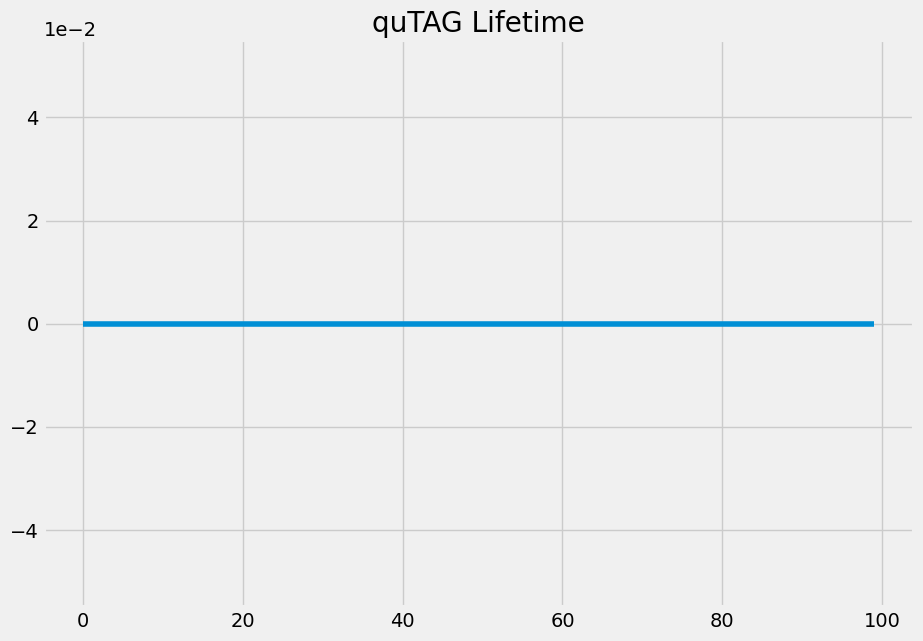

In [20]:
qutag.deInitialize()


# Plotting with mathplotlib
style.use('fivethirtyeight')
fig = plt.figure()
fig.set_size_inches(10,7)
ax1 = fig.add_subplot(1,1,1)
plt.cla() # clear old plotting data
# plot the datapoints
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.plot(analyse[3])
ax1.set_title('quTAG Lifetime')		
plt.pause(0.05)

In [4]:
qutag.setExposureTime(1)

0

In [5]:
qutag.enableChannels(True)

0

In [6]:
rc = qutag.getChannelsEnabled()
rc

'11111111'

In [7]:
qutag.setCoincidenceWindow(1)

0

In [8]:
data,updates = qutag.getCoincCounters()
print("data: ", data)

data:  [0 0 0 0 0 6 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
timestamps_data = qutag.getLastTimestamps(True)
timestamps_array = timestamps_data[0]
channel_numbers_array = timestamps_data[1]

# Filter time-tags for a specific channel, e.g., channel 1
channel_of_interest = 5
time_tags_channel_1 = [timestamps_array[i] for i in range(len(timestamps_array)) if channel_numbers_array[i] == channel_of_interest]

# Convert the time-tags to a more readable format if needed, e.g., from ps to ms
time_tags_channel_1_ms = [tag / 1e9 for tag in time_tags_channel_1] # Convert ps to ms

In [29]:
time_tags_channel_1_ms[-1]-time_tags_channel_1_ms[0]

111639.96275028889

In [30]:
print("latest timestamp: ", timestamps_data[0][timestamps_data[2]-1]/(1E12))


latest timestamp:  1778.467254037773


In [31]:
len(time_tags_channel_1)

475122

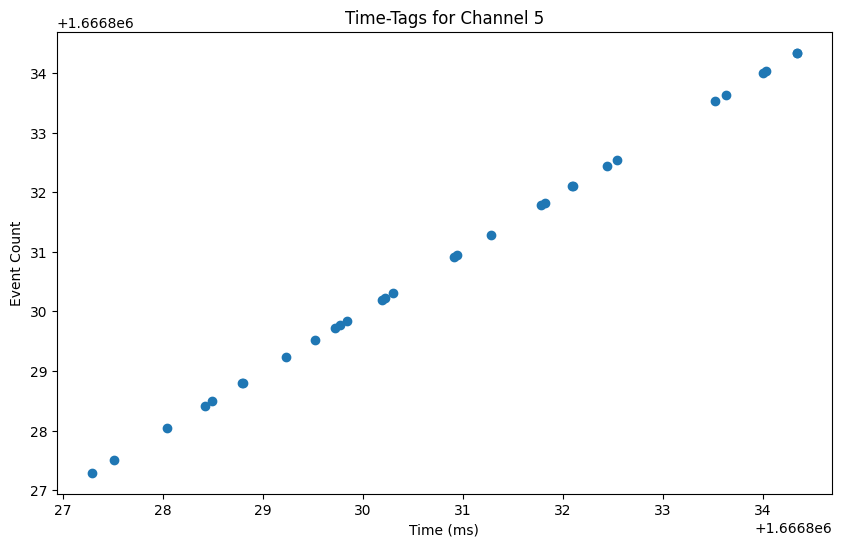

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(time_tags_channel_1_ms[0:30],time_tags_channel_1_ms[0:30], 'o') # Plot time-tags vs. event count
plt.xlabel('Time (ms)')
plt.ylabel('Event Count')
plt.title(f'Time-Tags for Channel {channel_of_interest}')
plt.show()

In [102]:
rc=qutag.getDataLost()
rc

1

In [103]:
timebase=qutag.getTimebase()

In [104]:
timebase

1e-12

In [105]:
na, coincWin, expTime=qutag.getDeviceParams()

In [44]:
na, coincWin, expTime

(0, 100, 1)

In [25]:
100*1e-12

1e-10

In [77]:
rc = qutag.startCalibration()
# wait a little to get the device started calibrating
time.sleep(.5)

calibState = qutag.getCalibrationState()
print("getCalibrationState", calibState)

while calibState:
	time.sleep(0.1)
	calibState = qutag.getCalibrationState()
	#print("getCalibrationState: ", calibState)
print("CalibrationState done:", calibState)

getCalibrationState 1
CalibrationState done: 0


In [4]:
qutag.checkFeatureHBT()

True

In [6]:
qutag.enableHBT(True)

0

In [7]:
qutag.getTimebase()

1e-12

In [8]:
ps=qutag.getTimebase()
ns=1000*ps

In [9]:
plotWidth=300*ns

In [10]:
binCount=1000

In [11]:
binWidth=plotWidth/binCount

In [53]:
qutag.setHBTParams(int(binWidth/ps), binCount)

0

In [54]:
fct=qutag.createHBTFunction()

In [55]:
qutag.getHBTParams()

(300, 1000)

In [56]:
qutag.setHBTInput(5,6)

0

2875.768369975808


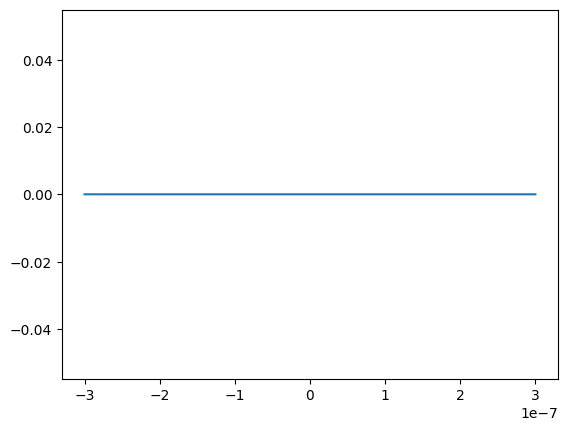

In [159]:
print(qutag.getHBTIntegrationTime())
qutag.getHBTCorrelations(0, fct)
qutag.calcHBTG2(fct)
analyse1 = qutag.analyzeHBTFunction(fct)
qutag.getHBTCorrelations(1, fct)
qutag.calcHBTG2(fct)
analyse2 = qutag.analyzeHBTFunction(fct)
timeBins=np.linspace(-binWidth*binCount, binWidth*binCount, num=1999)
plt.plot(timeBins,analyse1[4]-analyse2[4])

In [160]:
analyse1

(1999,
 1999,
 300,
 999,
 array([0.98629842, 1.0604562 , 0.99124227, ..., 1.10495086, 0.98629842,
        1.04315271]))

2800.991700679943


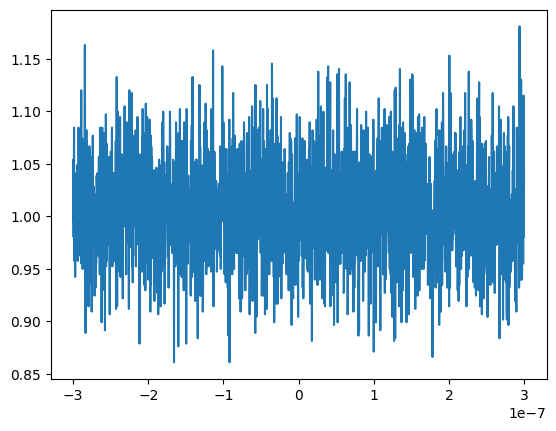

In [158]:
print(qutag.getHBTIntegrationTime())
qutag.getHBTCorrelations(1, fct)
qutag.calcHBTG2(fct)
analyse = qutag.analyzeHBTFunction(fct)
timeBins=np.linspace(-binWidth*binCount, binWidth*binCount, num=1999)
plt.plot(timeBins,analyse[4])

In [140]:
analyse = qutag.analyzeHBTFunction(calc)

ArgumentError: argument 1: <class 'TypeError'>: expected LP_TDC_HbtFunction instance instead of int